# Hazard: Tropical cyclones

Tropical cyclones tracks are modelled in class `TCTracks` and then provided to the hazard `TropCyclone`.

# TCTracks class

`TCTracks` reads and deals with tropical cyclone tracks of the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) repository.

In [1]:
from climada.hazard import TCTracks
help(TCTracks)

2019-01-23 08:51:17,916 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Help on class TCTracks in module climada.hazard.tc_tracks:

class TCTracks(builtins.object)
 |  Contains tropical cyclone tracks.
 |  
 |  Attributes:
 |      data (list(xarray.Dataset)): list of tropical cyclone tracks. Each
 |          track contains following attributes:
 |              - time (coords)
 |              - lat (coords)
 |              - lon (coords)
 |              - time_step
 |              - radius_max_wind
 |              - max_sustained_wind
 |              - central_pressure
 |              - environmental_pressure
 |              - max_sustained_wind_unit (attrs)
 |              - central_pressure_unit (attrs)
 |              - name (attrs)
 |              - orig_event_flag (attrs)
 |              - data_provider (attrs)
 |              - basin (attrs)
 |              - id_no (attrs)
 |              - category (attrs)
 |          computed during processing:
 |              - on_land
 |              - dist_since_lf
 |  
 |  Methods defined here:
 |  
 |  __init__

A tropical cyclone track information is stored in a `Dataset` of the `xarray` library (see [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html)). `TCTracks` class just contains the different `Datasets` of the tracks and methods to build them and operate over them. 

### EXERCISE

Read "trac_brb_test.csv" file containing a tropical cyclone track in Barbados. Use the `TCTracks`.


In [2]:
from climada.util import SOURCE_DIR
import os
BRB_TRACK = os.path.join(SOURCE_DIR, 'hazard/test/data', 'trac_brb_test.csv')

# Put your code here




In [3]:
# SOLUTION:
from climada.util import SOURCE_DIR
import os
# 1.Read "trac_brb_test.csv" file containing a tropical cyclone track in Barbados.
BRB_TRACK = os.path.join(SOURCE_DIR, 'hazard/test/data', 'trac_brb_test.csv')
tc_track_brb = TCTracks()
tc_track_brb.read_ibtracs_csv(BRB_TRACK)
tc_track_brb.get_track()

2019-01-23 08:51:19,050 - climada.hazard.tc_tracks - INFO - Reading /Users/aznarsig/Documents/Python/climada_python/climada/hazard/test/data/trac_brb_test.csv


<xarray.Dataset>
Dimensions:                 (time: 38)
Coordinates:
  * time                    (time) datetime64[ns] 1951-08-27T06:00:00 ...
    lat                     (time) float64 12.3 12.3 12.3 12.3 12.3 12.3 ...
    lon                     (time) float64 -25.6 -26.6 -27.6 -28.7 -29.8 ...
Data variables:
    time_step               (time) float64 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 ...
    radius_max_wind         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    max_sustained_wind      (time) float64 25.0 25.0 25.0 25.0 25.0 25.0 ...
    central_pressure        (time) float64 1.005e+03 1.005e+03 1.005e+03 ...
    environmental_pressure  (time) float64 1.01e+03 1.01e+03 1.01e+03 ...
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     1951239N12334
    orig_event_flag:          True
    data_provider:            hurdat_atl
    basin:                    nan
    id_no:                    1951239012334.0
    category:          

The dimensions defined in the tropical cyclone track are different to those of usual weather observations. We don't have a fixed location (x, y) and different measures at different times, but only an observation which is taken at a different locations for each time. This is the reason why the tracks only have one dimension, the time, and coordinates lat and lon for every time.

### EXERCISE

Using the previous tropical cyclone track,

1. Which is the time frequency of the data?
2. Compute the maximum sustained wind for each day.
3. Linearly interpolate the Dataset's data to a frequency of 1 hour.
4. Plot the track.

In [4]:
# Put your code here





Mean time frequency in hours: 6.0
Std time frequency in hours: 0.0

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 10)>
array([60., 80., 70., 65., 35., 25., 25., 25., 30., 45.])
Coordinates:
  * day      (day) int64 1 2 3 4 5 27 28 29 30 31

Interpolated Dataset:
<xarray.Dataset>
Dimensions:                 (time: 223)
Coordinates:
  * time                    (time) datetime64[ns] 1951-08-27T06:00:00 ...
Data variables:
    time_step               (time) float64 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 ...
    radius_max_wind         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    max_sustained_wind      (time) float64 25.0 25.0 25.0 25.0 25.0 25.0 ...
    central_pressure        (time) float64 1.005e+03 1.005e+03 1.005e+03 ...
    environmental_pressure  (time) float64 1.01e+03 1.01e+03 1.01e+03 ...


(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a17a9eb38>)

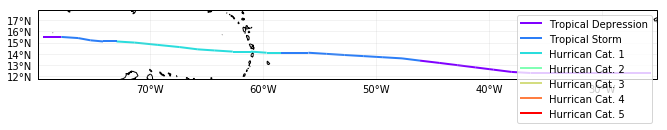

In [5]:
# SOLUTION:
import numpy as np
# select the track
track_brb = tc_track_brb.get_track()

# 1. Which is the time frequency of the data?
# Since there are few elements, one can see with the naked eye that the frequence is 6 hours
# It can also be computed:
# The values of a DataArray are numpy.arrays. 
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(track_brb.time)
# pint library would offer a more elegant solution, as shown below
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', track_brb.max_sustained_wind.groupby('time.day').max())
print()

# 3. Linearly interpolate the Dataset's data to a frequency of 1 hour.
# Most of Pandas DataFrame functionalities work for xarray Dataset. For example, the resample method:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html   
print('Interpolated Dataset:')
print(track_brb.resample(time='1H').interpolate('linear'))

# 4. Plot
tc_track_brb.plot()

### EXERCISE

Generate 9 synthetic tracks from the previous one. Plot them all.

In [6]:
# Put your code here





2019-01-23 08:51:22,189 - climada.hazard.tc_tracks - INFO - Computing 9 synthetic tracks.
2019-01-23 08:51:25,364 - climada.hazard.tc_tracks - INFO - No historical track with landfall.
2019-01-23 08:51:25,370 - climada.hazard.tc_tracks - INFO - No decay coefficients.


(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a25755e10>)

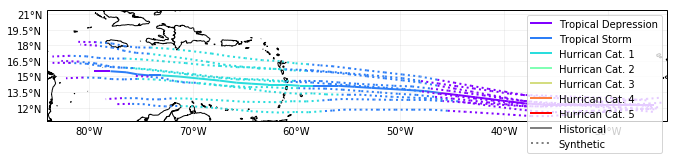

In [7]:
# SOLUTION:
tc_track_brb.calc_random_walk()
tc_track_brb.plot()


# TropCyclone class

The `TropCyclone` class is a derived class of `Hazard`. As such, it contains all the attributes and methods of a `Hazard`. Additionally, it contains the method `set_from_track()` to model tropical cyclones from tracks of events contrined in a `TCTracks` instance. 

When setting a tropical cyclone from a track, the centroids can be provided. If no centroids are provided, the global centroids `GLB_NatID_grid_0360as_adv_2.mat` are used (as explained in [Centroids class](3_exp_centr_pd_crt.ipynb#Centroids-class)). The method used to calculate the wind gusts (the hazard intensity) can also be configured. The default (and only implemented up to now) is the method of Holland 2008.

In [8]:
from climada.hazard import TropCyclone
help(TropCyclone)

Help on class TropCyclone in module climada.hazard.trop_cyclone:

class TropCyclone(climada.hazard.base.Hazard)
 |  Contains tropical cyclone events.
 |  Attributes:
 |      category (np.array(int)): for every event, the TC category using the
 |          Saffir-Simpson scale:
 |              -1 tropical depression
 |               0 tropical storm
 |               1 Hurrican category 1
 |               2 Hurrican category 2
 |               3 Hurrican category 3
 |               4 Hurrican category 4
 |               5 Hurrican category 5
 |  
 |  Method resolution order:
 |      TropCyclone
 |      climada.hazard.base.Hazard
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Empty constructor.
 |  
 |  set_from_tracks(self, tracks, centroids=None, description='', model='H08')
 |      Clear and model tropical cyclone from input IBTrACS tracks.
 |      Parallel process.
 |      Parameters:
 |          tracks (TCTracks): tracks of events
 |          ce

### EXERCISE

* Build a `TropCyclone` instance from the previous tracks over Barbados. 
* Plot the track's intensity of event 1951239N12334.
* Print the date of the synthetic event 1951239N12334_gen5.

In [9]:
# Put your code here:





2019-01-23 08:51:28,504 - climada.hazard.centroids.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/GLB_NatID_grid_0360as_adv_2.mat
2019-01-23 08:51:30,321 - climada.hazard.trop_cyclone - INFO - Mapping 10 tracks to 1656093 centroids.
2019-01-23 08:52:04,615 - climada.hazard.trop_cyclone - DEBUG - Append events.
2019-01-23 08:52:06,864 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.
Date: ['1951-08-27']


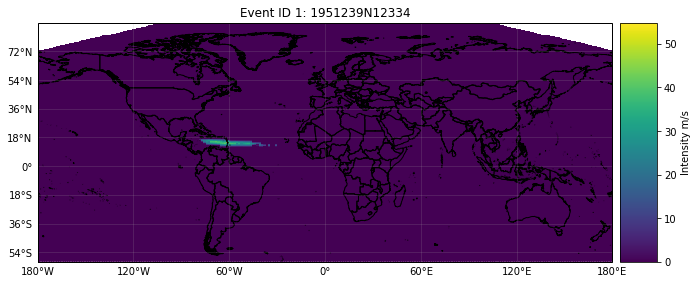

In [10]:
# SOLUTION:

tc_haz_brb = TropCyclone()
tc_haz_brb.set_from_tracks(tc_track_brb) # Default global centroids are used, which makes it slower

# Plotting the event with id 1
tc_haz_brb.plot_intensity('1951239N12334')

# The start date of the events are stored in the Hazard.date variable (without time).
# To change from ordinal format to date, we can use the datetime package
import datetime as dt
print('Date:', tc_haz_brb.get_event_date('1951239N12334_gen5'))

### EXERCISE

Read the tropical cyclones in `HAZ_DEMO_MAT` using the TropCyclone class. Check how many historical events are contained.

In [11]:
# Put your code here:





In [12]:
# SOLUTION:
from climada.util import HAZ_DEMO_MAT
tc_haz = TropCyclone()
tc_haz.read(HAZ_DEMO_MAT)
print('Number of historical events:', tc_haz.orig.nonzero()[0].size)

2019-01-23 08:52:42,398 - climada.hazard.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2019-01-23 08:52:42,457 - climada.hazard.centroids.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2019-01-23 08:52:42,492 - climada.util.checker - DEBUG - Centroids.region_id not set. 
2019-01-23 08:52:49,179 - climada.util.checker - DEBUG - Hazard.category not set. 
Number of historical events: 1445
